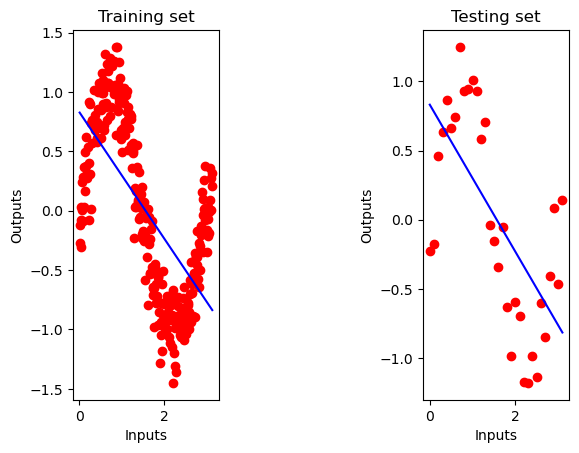

Total no. of iteration for Eta:  0.001  are =  11631
MSE on Training Data:  0.14975326648996995
MSE on Testing Data:  0.1572215893972857
Testing set has more MSE


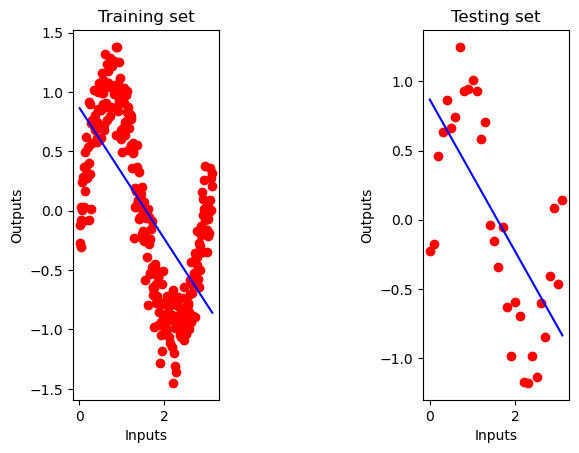

Total no. of iteration for Eta:  0.01  are =  2439
MSE on Training Data:  0.14953873352866312
MSE on Testing Data:  0.15786726542454083
Testing set has more MSE


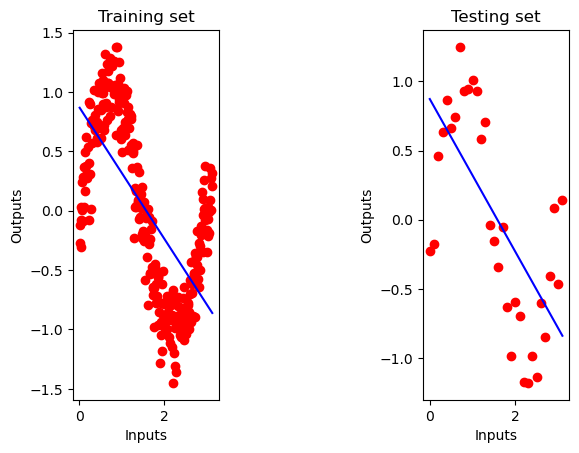

Total no. of iteration for Eta:  0.1  are =  386
MSE on Training Data:  0.14953639921725073
MSE on Testing Data:  0.15795625574030786
Testing set has more MSE


In [2]:
import random                                  # help to generate random number
import numpy as np                             # help in matrices related operations
import pandas as pd                            # help to transform csv data into numpy                      
import matplotlib.pyplot as plt                # help in ploting and visuaization
%matplotlib inline

Trn_Data = pd.read_csv('trainRegression.csv')  # to load csv file into data frame
Tst_Data = pd.read_csv('testRegression.csv')

#print (Trn_Data.head())                       # to show first five records of dataframe in tabular form by defualt
#print (Trn_Data.head(n))                      # to show n records of dataframe in tabular form

Trn_Inputs  = np.array(Trn_Data['X'])          # type casting training data into numpy.
                                               # Trn_Inputs is 1-rank array or vector
Trn_Outputs = np.array(Trn_Data['R'])          

Tst_Inputs  = np.array(Tst_Data['X'])          # type casting testing data into numpy. 
Tst_Outputs = np.array(Tst_Data['R'])

Etas = [0.001 , 0.01 , 0.1]

for Eta in Etas:
    
    Thetas = np.zeros((2,1))                      # create 2 x 1 array of zeros for unknown parameters
    Updated_Thetas = np.zeros((2,1))

    Thetas[0,0] = random.uniform(0,1)             # generate random number between 0 and 1 (both inclusive)
    Thetas[1,0] = random.uniform(0,1)
    Updated_Thetas[0,0] = Thetas[0,0]
    Updated_Thetas[1,0] = Thetas[1,0]
    Flag = True
    Iterations = 0

    while (not(np.allclose(Updated_Thetas , Thetas)) or Flag):
        Flag = False
                      
        Thetas[0,0] = Updated_Thetas[0,0]
        Thetas[1,0] = Updated_Thetas[1,0]

        Predictions_On_Trn_Data = Thetas[0,0] + (Thetas[1,0] * Trn_Inputs)

        Temp0 = Thetas[0,0] - Eta * (sum(Predictions_On_Trn_Data - Trn_Outputs) / Trn_Inputs.shape[0])
        Temp1 = Thetas[1,0] - Eta * (sum((Predictions_On_Trn_Data - Trn_Outputs)*(Trn_Inputs)) / Trn_Inputs.shape[0])

        Updated_Thetas[0,0] = Temp0
        Updated_Thetas[1,0] = Temp1
      
        Iterations += 1
        
        #print (Thetas)

    Thetas[0,0] = Updated_Thetas[0,0]
    Thetas[1,0] = Updated_Thetas[1,0]

    Predictions_On_Trn_Data = Thetas[0,0] + (Thetas[1,0] * Trn_Inputs) # predictions on training data 
                                                                       # Scalar-vector multiplication
                                                                       # scalor-vector addition
    plt.subplot(1,3,1)
    plt.scatter(Trn_Inputs , Trn_Outputs , color='red')
    plt.plot(Trn_Inputs , Predictions_On_Trn_Data, color = 'blue')
    plt.title('Training set')
    plt.xlabel('Inputs')
    plt.ylabel('Outputs')

    # measure mean square error on training data
    MSE_Trn = np.sum((Predictions_On_Trn_Data - Trn_Outputs)**2) / (2 * Trn_Inputs.shape[0])

    # another approach to find MSE
    #MSE_Trn = np.dot((Predictions_On_Trn_Data - Trn_Outputs),(Predictions_On_Trn_Data - Trn_Outputs)) / (2 * Trn_Inputs.shape[0])

    Predictions_On_Tst_Data = Thetas[0,0] + (Thetas[1,0] * Tst_Inputs) # predictions on testing data

    plt.subplot(1,3,3)
    plt.scatter(Tst_Inputs , Tst_Outputs , color='red')
    plt.plot(Tst_Inputs , Predictions_On_Tst_Data, color = 'blue')
    plt.title('Testing set')
    plt.xlabel('Inputs')
    plt.ylabel('Outputs')
    plt.show()

    # measure mean square error on testing data
    MSE_Tst = np.sum((Predictions_On_Tst_Data - Tst_Outputs)**2) / (2 * Tst_Inputs.shape[0])
    
    print ('Total no. of iteration for Eta: ' , Eta , ' are = ' , Iterations)
    print ("MSE on Training Data: " , MSE_Trn)
    print ("MSE on Testing Data: " , MSE_Tst)

    if MSE_Trn == MSE_Tst:
        print ('Both data sets has same MSE')
    elif MSE_Trn > MSE_Tst:
        print ('Training set has more MSE')
    else:
        print ('Testing set has more MSE')